# Generating Raw Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

thaiStocks =['2S', '3K-BAT', '7UP', 'A', 'A5', 'AAV', 'ABICO', 'ABM', 'ABPIF', 'ACAP', 'ACC', 'ACE', 'ACG', 
             'ADB', 'ADD', 'ADVANC', 'AEC', 'AEONTS', 'AF', 'AFC', 'AGE', 'AH', 'AHC', 'AI', 'AIE', 'AIMCG', 
             'AIMIRT', 'AIRA', 'AIT', 'AJ', 'AJA', 'AKP', 'AKR', 'ALL', 'ALLA', 'ALLY', 'ALT', 'ALUCON', 
             'AMA', 'AMANAH', 'AMARIN', 'AMATA', 'AMATAR', 'AMATAV', 'AMC', 'ANAN', 'AOT', 'AP', 'APCO', 
             'APCS', 'APEX', 'APP', 'APURE', 'AQ', 'AQUA', 'ARIN', 'ARIP', 'ARROW', 'AS', 'ASAP', 'ASEFA', 'ASIA', 
             'ASIAN', 'ASIMAR', 'ASK', 'ASN', 'ASP', 'ASW', 'ATP30', 'AU', 'AUCT', 'AWC', 'AYUD', 'B', 'B52', 'BA', 
             'BAFS', 'BAM', 'BANPU', 'BAY', 'BBL', 'BC', 'BCH', 'BCP', 'BCPG', 'BCT', 'BDMS', 'BEAUTY', 'BEC', 'BEM', 
             'BFIT', 'BGC', 'BGRIM', 'BGT', 'BH', 'BIG', 'BIZ', 'BJC', 'BJCHI', 'BKD', 'BKI', 'BKKCP', 'BLA', 'BLAND', 
             'BLISS', 'BM', 'BOFFICE', 'BOL', 'BPP', 'BR', 'BROCK', 'BROOK', 'BRR', 'BRRGIF', 'BSBM', 'BTNC', 'BTS', 
             'BTSGIF', 'BTW', 'BUI', 'BWG', 'CAZ', 'CBG', 'CCET', 'CCP', 'CEN', 'CENTEL', 'CFRESH', 'CGD', 'CGH', 'CHARAN', 
             'CHAYO', 'CHEWA', 'CHG', 'CHO', 'CHOTI', 'CHOW', 'CI', 'CIG', 'CIMBT', 'CITY', 'CK', 'CKP', 'CM', 'CMAN', 'CMC', 
             'CMO', 'CMR', 'CNT', 'COLOR', 'COM7', 'COMAN', 'COTTO', 'CPALL', 'CPF', 'CPH', 'CPI', 'CPL', 'CPN', 'CPNCG', 
             'CPNREIT', 'CPR', 'CPT', 'CPTGF', 'CPW', 'CRANE', 'CRC', 'CRD', 'CSC', 'CSP', 'CSR', 'CSS', 'CTARAF', 'CTW', 
             'CWT', 'D', 'DCC', 'DCON', 'DDD', 'DELTA', 'DEMCO', 'DHOUSE', 'DIF', 'DIMET', 'DITTO', 'DMT', 'DOD', 'DOHOME', 
             'DREIT', 'DRT', 'DTAC', 'DTCI', 'DV8', 'EA', 'EASON', 'EASTW', 'ECF', 'ECL', 'EE', 'EFORL', 'EGATIF' , 'EGCO', 
             'EKH', 'EMC', 'EP', 'EPG', 'ERW', 'ERWPF', 'ESSO', 'ESTAR', 'ETC', 'ETE', 'EVER', 'F&D', 'FANCY', 'FE', 'FLOYD', 
             'FMT', 'FN', 'FNS', 'FORTH', 'FPI', 'FPT', 'FSMART', 'FSS', 'FTE', 'FTREIT', 'FUTUREPF', 'FVC', 'GAHREIT', 'GBX', 
             'GC', 'GCAP', 'GEL', 'GENCO', 'GFPT', 'GGC', 'GIFT', 'GJS', 'GL', 'GLAND', 'GLOBAL', 'GLOCON', 'GOLDPF', 'GPI', 
             'GPSC', 'GRAMMY', 'GRAND', 'GREEN', 'GSC', 'GSTEEL', 'GTB', 'GULF', 'GUNKUL', 'GVREIT', 'GYT', 'HANA', 'HARN', 
             'HEMP', 'HFT', 'HMPRO', 'HPF', 'HPT', 'HREIT', 'HTC', 'HTECH', 'HUMAN', 'HYDRO','ICC', 'ICHI', 'ICN', 'IFS', 
             'IHL', 'IIG', 'III', 'ILINK', 'ILM', 'IMH', 'IMPACT', 'IND', 'INET', 'INGRS', 'INOX', 'INSET', 'INSURE', 
             'INTUCH', 'IP', 'IRC', 'IRCP', 'IRPC', 'IT', 'ITD', 'ITEL', 'IVL', 'J', 'JAK', 'JAS', 'JASIF', 'JCK', 'JCKH', 
             'JCT', 'JKN', 'JMART', 'JMT', 'JR', 'JSP', 'JTS', 'JUBILE', 'JUTHA', 'JWD', 'K', 'KAMART', 'KASET', 'KBANK', 
             'KBS', 'KBSPIF', 'KC', 'KCAR', 'KCE', 'KCM', 'KDH', 'KEX', 'KGI', 'KIAT', 'KISS', 'KK', 'KKC', 'KKP', 'KOOL', 
             'KPNPF', 'KSL', 'KTB', 'KTC', 'KTIS', 'KUMWEL', 'KUN', 'KWC', 'KWG', 'KWM', 'KYE', 'L&E', 'LALIN', 'LANNA', 'LDC',
             'LEE', 'LEO', 'LH', 'LHFG', 'LHHOTEL', 'LHK', 'LHPF', 'LHSC', 'LIT', 'LOXLEY', 'LPF','LPH', 'LPN', 'LRH', 'LST', 
             'LUXF','M', 'M-CHAI', 'M-II','M-STOR', 'MACO', 'MAJOR', 'MAKRO', 'MALEE', 'MANRIN', 'MATCH', 'MATI', 
             'MAX', 'MBAX', 'MBK', 'MBKET', 'MC', 'MCOT', 'MCS', 'MDX', 'MEGA', 'MENA', 'META', 'METCO', 'MFC', 'MFEC', 'MGT',
             'MICRO', 'MIDA', 'MILL', 'MINT', 'MIPF', 'MIT', 'MITSIB', 'MJD', 'MJLF', 'MK', 'ML', 'MINT', 'MNRF', 'MODERN', 
             'MONO', 'MOONG', 'MORE', 'MPIC', 'MSC', 'MTC', 'MTI', 'MUD', 'MVP','OCC', 'OCEAN', 'OGC', 'OHTL', 'OISHI', 'OR', 
             'ORI', 'OSP', 'OTO','PACE', 'PACO', 'PAF', 'PAP', 'PATO', 'PB', 'PCSGH', 'PDG', 'PDI', 'PDJ', 'PE', 'PERM',
             'PF', 'PG', 'PHOL', 'PICO', 'PIMO', 'PJW', 'PK', 'PL', 'PLANB', 'PLANET', 'PLAT', 'PLE', 'PM', 'PMTA', 'POLAR', 
             'POMPUI', 'POPF', 'PORT', 'POST', 'PPF', 'PPM', 'PPP', 'PPPM', 'PPS', 'PR9', 'PRAKIT', 'PRAPAT', 'PREB', 'PRECHA',
             'PRG', 'PRIME', 'PRIN', 'PRINC', 'PRM', 'PROEN', 'PROS', 'PROSPECT', 'PROUD', 'PSH', 'PSL', 'PSTC', 'PT', 'PTG', 
             'PTL', 'PTT', 'PTTEP', 'PTTGC', 'PYLON','Q-CON', 'QH', 'QHHR', 'QHOP', 'QHPF', 'QLT', 'QTC', 'RAM', 'RATCH', 'RBF',
             'RCI', 'RCL', 'RICHY', 'RJH', 'RML', 'ROCK', 'ROH', 'ROJNA', 'RP', 'RPC', 'RPH', 'RS', 'RSP', 'RT', 'RWI', 'S', 
             'S-&-J', 'S11', 'SA', 'SAAM', 'SABINA', 'SABUY', 'SAFARI', 'SAK', 'SALEE', 'SAM', 'SAMART', 'SAMCO', 'SAMTEL', 
             'SANKO', 'SAPPE', 'SAT', 'SAUCE', 'SAWAD', 'SAWANG', 'SBPF', 'SC', 'SCB', 'SCC', 'SCCC', 'SCG', 'SCGP', 'SCI', 
             'SCM', 'SCN', 'SCP', 'SDC', 'SE', 'SE-ED', 'SEAFCO', 'SEAOIL', 'SECURE', 'SELIC', 'SENA', 'SF', 'SFLEX', 'SFP', 
             'SFT', 'SGF', 'SGP', 'SHANG', 'SHR', 'SHREIT', 'SIAM', 'SICT', 'SIMAT', 'SINGER', 'SIRI', 'SIRIP', 'SIS', 'SISB', 
             'SITHAI', 'SK', 'SKE', 'SKN', 'SKR', 'SKY', 'SLM', 'SLP', 'SMART', 'SMD', 'SMIT', 'SMK', 'SMPC', 'SMT', 'SNC', 
             'SNP', 'SO', 'SOLAR', 'SONIC', 'SORKON', 'SPA', 'SPACK', 'SPALI', 'SPC', 'SPCG', 'SPF', 'SPG', 'SPI', 'SPRC', 
             'SPRIME', 'SPVI', 'SQ', 'SR', 'SRICHA', 'SRIPANWA', 'SSC', 'SSF', 'SSP', 'SSPF', 'SSSC', 'SST', 'SSTRT', 'STA', 
             'STANLY', 'STAR', 'STARK', 'STC', 'STEC', 'STGT', 'STHAI', 'STI', 'STPI', 'SUC', 'SUN', 'SUPER', 'SUPEREIF', 
             'SUSCO', 'SUTHA', 'SVH', 'SVI', 'SVOA', 'SWC', 'SYMC', 'SYNEX', 'SYNTEC', 'T', 'TACC', 'TAE', 'TAKUNI', 'TAPAC', 
             'TASCO', 'TBSP', 'TC', 'TCAP', 'TCC', 'TCCC', 'TCJ', 'TCMC', 'TCOAT', 'TEAM', 'TEAMG', 'TFFIF', 'TFG', 'TFI', 
             'TFMAMA', 'TGH', 'TGPRO', 'TH', 'THAI', 'THANA', 'THANI', 'THCOM', 'THE', 'THG', 'THIP', 'THL', 'THMUI', 'THRE', 
             'THREL', 'TIDLOR', 'TIF1', 'TIGER', 'TIP', 'TIPCO', 'TISCO', 'TITLE', 'TK', 'TKN', 'TKS', 'TKT', 'TLHPF', 'TM', 
             'TMC', 'TMD', 'TMI', 'TMILL', 'TMT', 'TMW', 'TNDT', 'TNH', 'TNITY', 'TNL', 'TNP', 'TNPC', 'TNPF', 'TNR', 'TOA', 
             'TOG', 'TOP', 'TOPP', 'TPA', 'TPAC', 'TPBI', 'TPCH', 'TPCS', 'TPIPL', 'TPIPP', 'TPLAS', 'TPOLY', 'TPP', 'TPRIME', 
             'TPS', 'TQM', 'TQR', 'TR', 'TRC', 'TRITN', 'TRT', 'TRU', 'TRUBB', 'TRUE', 'TSC', 'TSE', 'TSI', 'TSR', 'TSTE', 
             'TSTH', 'TTA', 'TTB', 'TTCL', 'TTI', 'TTLPF', 'TTT', 'TTW', 'TU', 'TVD','TVO', 'TVT', 'TWP', 'TWPC', 
             'TWZ', 'TYCN', 'U', 'UAC', 'UBIS', 'UEC', 'UKEM', 'UMI', 'UMS', 'UNIQ', 'UOBKH', 'UP', 'UPA', 'UPF', 'UPOIC', 
             'URBNPF', 'UREKA', 'UT', 'UTP', 'UV', 'UVAN', 'VARO', 'VCOM', 'VGI', 'VI', 'VIBHA', 'VIH', 'VL', 'VNG', 'VNT', 
             'VPO', 'VRANDA', 'W', 'WACOAL', 'WAVE', 'WGE', 'WHA', 'WHABT', 'WHART', 'WHAUP', 'WICE', 'WIIK', 'WIN', 'WINMED',
             'WINNER', 'WORK', 'WORLD', 'WP', 'WPH', 'WR', 'XO', 'YCI', 'YGG', 'YUASA', 'ZEN', 'ZIGA']

rawData = {}
removedStocksDummy = {}
reasons = ["Unable to extract ROA", 
           "Unable to extract ROE", 
           "Unable to extract both ROA and ROE"]


for i in range(len(thaiStocks)):
    
    print(thaiStocks[i])
    
    stockROA = yf.Ticker(thaiStocks[i]+".BK").info["returnOnAssets"]
    stockROE = yf.Ticker(thaiStocks[i]+".BK").info["returnOnEquity"]
    
    if stockROA == None and stockROE == None:
        removedStocksDummy[thaiStocks[i]] = reasons[2]
        continue
    if stockROA == None:
        removedStocksDummy[thaiStocks[i]] = reasons[0]
        continue
    if stockROE == None:
        removedStocksDummy[thaiStocks[i]] = reasons[1]
        continue
        
    rawData[thaiStocks[i]] = {}
    rawData[thaiStocks[i]]["Return on Assets"] = stockROA*100
    rawData[thaiStocks[i]]["Return on Equity"] = stockROE*100

rawData = pd.DataFrame.from_dict(rawData).transpose()

# Removing Outliers

In [ ]:
dummyRawData = rawData 

roaFilter = dummyRawData.iloc[:,0] < 40 
roeFilter = dummyRawData.iloc[:,1] < 30 

data = {'ROA Filter': roaFilter.tolist(), 
        'ROE Filter': roeFilter.tolist()}

filterData = pd.DataFrame(data, columns = ['ROA Filter', 'ROE Filter'])
filterData.index = dummyRawData.index

roaOutlier = filterData[filterData['ROA Filter'] == False]
roaOutlier = roaOutlier.drop(['ROE Filter'], axis=1)
roeOutlier = filterData[filterData['ROE Filter'] == False]
roeOutlier = roeOutlier.drop(['ROA Filter'], axis=1)

filteredRawData = dummyRawData[roaFilter & roeFilter]

# List of Removed Stocks

In [ ]:
roaOutlierList = list(roaOutlier.index)
roeOutlierList = list(roeOutlier.index)

outlierStocks = roaOutlierList
outlierStocks.extend(roeOutlierList)

roaOutlierList = list(roaOutlier.index)

outlierStocks = set(outlierStocks)
outlierStocks = list(outlierStocks)

reasons = ["ROA Outlier",
           "ROE Outlier",
           "ROA and ROE Outlier"]

for i in range(len(outlierStocks)):
    
    if outlierStocks[i] in roaOutlierList and outlierStocks[i] in roeOutlierList :
        removedStocksDummy[outlierStocks[i]] = reasons[2]
        continue
   
    if outlierStocks[i] in roaOutlierList:
        removedStocksDummy[outlierStocks[i]] = reasons[0]
        continue
        
    if outlierStocks[i] in roeOutlierList:
        removedStocksDummy[outlierStocks[i]] = reasons[1]
        continue
        
removedStocks = pd.DataFrame({"Reasons":list(removedStocksDummy.values())})
removedStocks.index = list(removedStocksDummy.keys())

# Displaying Raw Data

In [31]:
filteredRawData = pd.read_csv (r'filteredRawData.csv')
filteredRawData = filteredRawData.set_index('Unnamed: 0')
filteredRawData.index.names = [None]

removedStocks = pd.read_csv (r'removedStocks.csv')
removedStocks = removedStocks.set_index('Unnamed: 0')
removedStocks.index.names = [None]

display(filteredRawData)
display(removedStocks)

,Return on Assets,Return on Equity
3K-BAT,1.098000,1.452000
7UP,-2.379000,9.174000
A,2.493000,4.580000
A5,8.067001,21.728000
AAV,-8.644000,-58.974000
...,...,...
WR,-2.750000,-19.365999
YGG,9.396000,15.767999
YUASA,9.263000,19.083000
ZEN,0.770000,0.695000


,Reasons
ABPIF,Unable to extract both ROA and ROE
ADD,Unable to extract both ROA and ROE
AIMCG,Unable to extract both ROA and ROE
APEX,Unable to extract ROE
BRRGIF,Unable to extract both ROA and ROE
...,...
WINMED,Unable to extract both ROA and ROE
WORLD,Unable to extract both ROA and ROE
YCI,Unable to extract both ROA and ROE
XO,ROE Outlier


# Statistical Summary

In [32]:
statSum = filteredRawData.describe()
statSum.loc["+3 std"] = statSum.loc["mean"] + (statSum.loc["std"] * 3)
statSum.loc["-3 std"] = statSum.loc["mean"] - (statSum.loc["std"] * 3)

statSum

,Return on Assets,Return on Equity
count,709.000000,709.000000
mean,2.213630,1.799508
std,5.133625,38.698868
min,-55.487996,-898.549000
25%,0.128000,-0.426000
50%,2.321000,5.615000
75%,4.484000,11.525000
max,17.657000,29.939000
+3 std,17.614505,117.896112
-3 std,-13.187244,-114.297097


# Removing Outliers 2

In [33]:
roaFilter = filteredRawData.iloc[:,0] > -40 
roeFilter = filteredRawData.iloc[:,1] > -30 

data = {'ROA Filter': roaFilter.tolist(), 
        'ROE Filter': roeFilter.tolist()}

filterData = pd.DataFrame(data, columns = ['ROA Filter', 'ROE Filter'])
filterData.index = filteredRawData.index

roaOutlier = filterData[filterData['ROA Filter'] == False]
roaOutlier = roaOutlier.drop(['ROE Filter'], axis=1)
roeOutlier = filterData[filterData['ROE Filter'] == False]
roeOutlier = roeOutlier.drop(['ROA Filter'], axis=1)

filteredRawData = filteredRawData[roaFilter & roeFilter]

In [34]:
statSum = filteredRawData.describe()
statSum.loc["+3 std"] = statSum.loc["mean"] + (statSum.loc["std"] * 3)
statSum.loc["-3 std"] = statSum.loc["mean"] - (statSum.loc["std"] * 3)

statSum

,Return on Assets,Return on Equity
count,685.000000,685.000000
mean,2.655670,5.382064
std,4.062655,11.053433
min,-15.018000,-29.459998
25%,0.372000,0.361000
50%,2.449000,6.016000
75%,4.734000,11.802000
max,17.657000,29.939000
+3 std,14.843635,38.542364
-3 std,-9.532295,-27.778236


# Finding the Numbers of Clusters

In [35]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

robustScaler = RobustScaler()
xTrainRobust = RobustScaler().fit_transform(filteredRawData)

resultDict = {}
clusters = 10

for k in range(2, clusters):
    
    print('-'*100)
    resultDict[k] = {}
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(xTrainRobust)
    
    silhouette = metrics.silhouette_score(xTrainRobust, kmeans.labels_, metric = 'euclidean')
    
    resultDict[k]["Silhouette Score"] = silhouette
    resultDict[k]["Inertia"] = kmeans.inertia_
    resultDict[k]["Score"] = kmeans.score
    resultDict[k]["Model"] = kmeans
    
    print("The number of clusters:{}".format(k))
    print("Silhouette Score: {}".format(silhouette))


----------------------------------------------------------------------------------------------------
The number of clusters:2
Silhouette Score: 0.44372048045974305
----------------------------------------------------------------------------------------------------
The number of clusters:3
Silhouette Score: 0.48453585101669877
----------------------------------------------------------------------------------------------------
The number of clusters:4
Silhouette Score: 0.42151921144355287
----------------------------------------------------------------------------------------------------
The number of clusters:5
Silhouette Score: 0.3966554280495999
----------------------------------------------------------------------------------------------------
The number of clusters:6
Silhouette Score: 0.3852630186689445
----------------------------------------------------------------------------------------------------
The number of clusters:7
Silhouette Score: 0.3830248913633005
-------------------

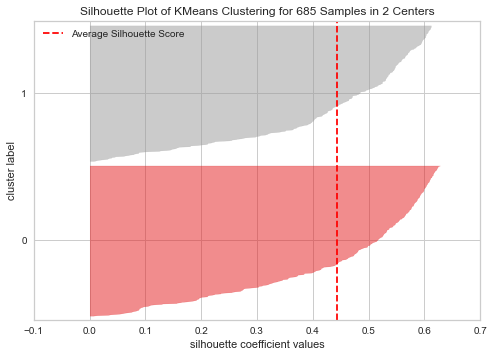

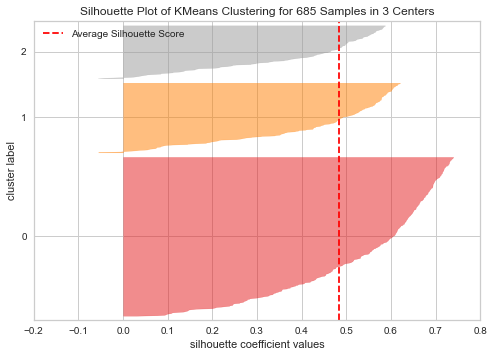

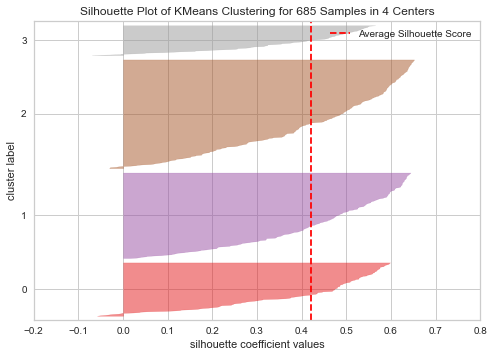

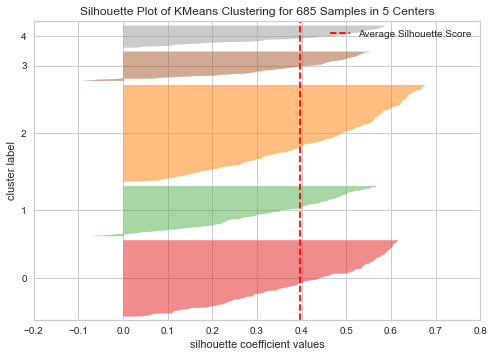

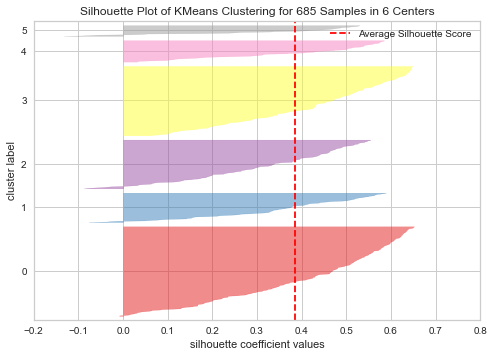

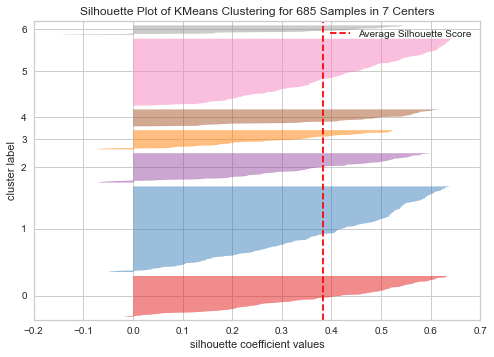

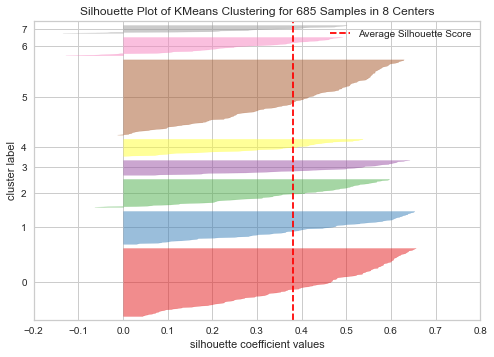

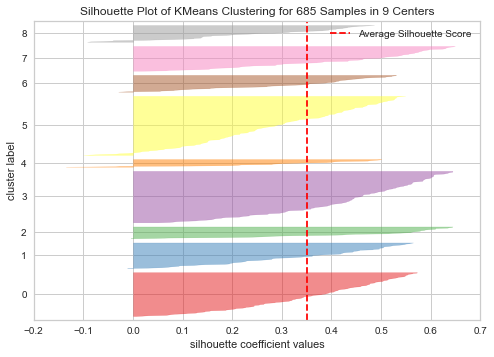

In [36]:
from yellowbrick.cluster import SilhouetteVisualizer 

clusters = 10

for k in range(2, clusters): 
    
    kmeans = KMeans(n_clusters = k, random_state = 0)
    visualizer = SilhouetteVisualizer(kmeans)
    
    visualizer.fit(xTrainRobust)
    
    visualizer.poof()

----------------------------------------------------------------------------------------------------


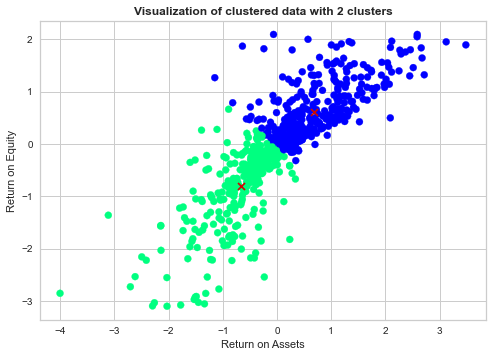

----------------------------------------------------------------------------------------------------


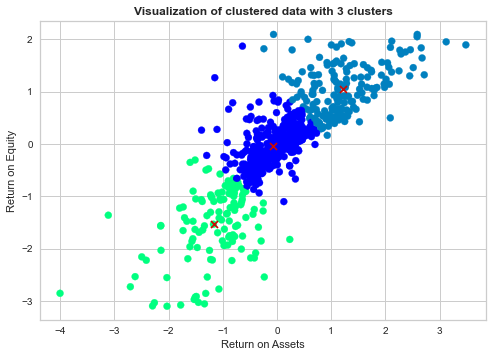

----------------------------------------------------------------------------------------------------


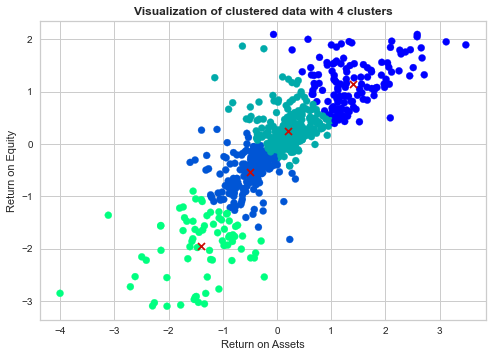

----------------------------------------------------------------------------------------------------


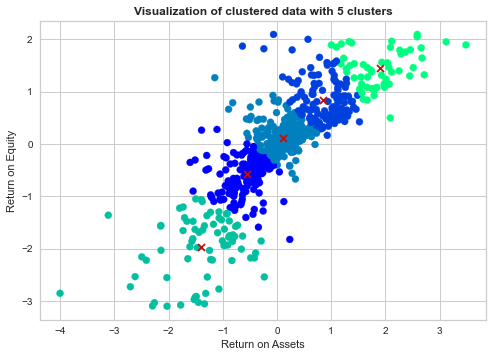

----------------------------------------------------------------------------------------------------


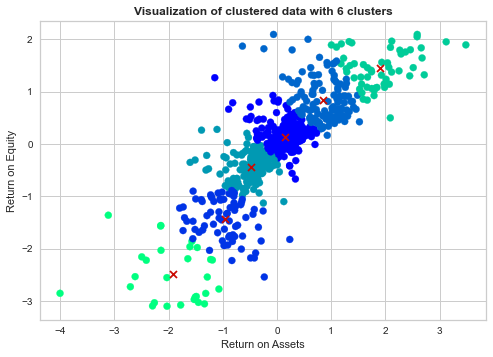

----------------------------------------------------------------------------------------------------


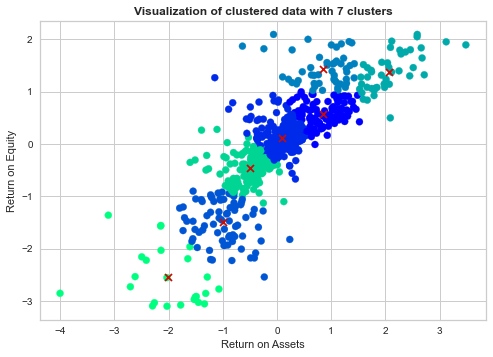

----------------------------------------------------------------------------------------------------


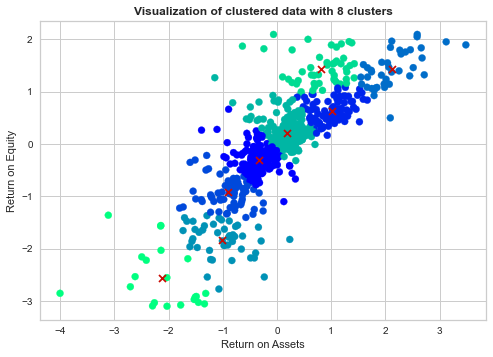

----------------------------------------------------------------------------------------------------


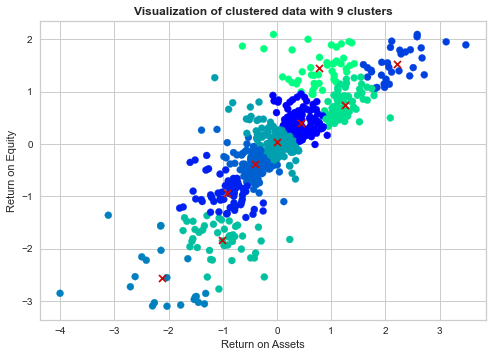

In [37]:
clusters = [2,3,4,5,6,7,8,9]

for cluster in clusters:
    
    print("-" * 100)
    kmeans = KMeans(n_clusters=cluster, random_state=0).fit(xTrainRobust)
    
    clusterCenters = kmeans.cluster_centers_
    c1 = clusterCenters[:,0]
    c2 = clusterCenters[:,1]
    
    plt.figure()
    
    x = xTrainRobust[:,0]
    y = xTrainRobust[:,1]
    
    columnNames = filteredRawData.columns
    plt.xlabel(columnNames[0])
    plt.ylabel(columnNames[1])
    
    plt.scatter(x, y, c=kmeans.labels_.astype(float), cmap = "winter", marker = 'o')
    plt.scatter(c1, c2, marker = 'x', color = 'r')
    
    plt.title("Visualization of clustered data with {} clusters".format(cluster), fontweight="bold")
    
    plt.show()  

# Conclusion

In [38]:
kk = KMeans(n_clusters = 4).fit(xTrainRobust)
labels = kk.labels_
labels = list(labels)
clusterLabels = [x+1 for x in labels]

filteredRawData["Cluster Label"] = clusterLabels

filteredRawData

,Return on Assets,Return on Equity,Cluster Label
3K-BAT,1.098000,1.452000,1
7UP,-2.379000,9.174000,1
A,2.493000,4.580000,3
A5,8.067001,21.728000,2
ABICO,4.151000,4.751000,3
...,...,...,...
WR,-2.750000,-19.365999,4
YGG,9.396000,15.767999,2
YUASA,9.263000,19.083000,2
ZEN,0.770000,0.695000,1


In [44]:
%pprint

Pretty printing has been turned OFF


In [51]:
stocks = list(filteredRawData.index.values)

group1 = []
group2 = []
group3 = []
group4 = []

for i in range(len(clusterLabels)):
    if clusterLabels[i] == 1:
        group1.append(stocks[i])
    if clusterLabels[i] == 2:
        group2.append(stocks[i])
    if clusterLabels[i] == 3:
        group3.append(stocks[i])
    if clusterLabels[i] == 4:
        group4.append(stocks[i])
        
print('GROUP 1:', list(group1))
print('='*100)
print('GROUP 2:', list(group2))
print('='*100)
print('GROUP 3:', list(group3))
print('='*100)
print('GROUP 4:', list(group4))
print('='*100)

GROUP 1: ['3K-BAT', '7UP', 'ABM', 'ACC', 'AFC', 'AH', 'AIRA', 'ALL', 'ALT', 'AMATAV', 'ANAN', 'AQUA', 'ARIP', 'ASAP', 'ASIA', 'AWC', 'AYUD', 'B', 'BAM', 'BANPU', 'BBL', 'BCP', 'BEC', 'BGT', 'BH', 'BIG', 'BJC', 'BJCHI', 'BKD', 'BLA', 'BLAND', 'BR', 'BTNC', 'BTW', 'BWG', 'CCET', 'CGH', 'CHEWA', 'CIMBT', 'CITY', 'CK', 'CKP', 'CM', 'CMAN', 'CMC', 'CMR', 'CNT', 'COMAN', 'CPH', 'CPL', 'CPNREIT', 'CPT', 'CRANE', 'CRC', 'CSR', 'D', 'DDD', 'DEMCO', 'DHOUSE', 'DV8', 'EASON', 'ECF', 'EE', 'EMC', 'ERWPF', 'F&D', 'FANCY', 'FN', 'FUTUREPF', 'FVC', 'GBX', 'GCAP', 'GEL', 'GENCO', 'GGC', 'GIFT', 'GJS', 'GLAND', 'GLOCON', 'GREEN', 'GSTEEL', 'GTB', 'GYT', 'ICC', 'IHL', 'IMH', 'IMPACT', 'IND', 'INGRS', 'INOX', 'INSURE', 'IT', 'ITD', 'JAK', 'JCK', 'JTS', 'KCM', 'KDH', 'KOOL', 'KPNPF', 'KSL', 'KTB', 'L&E', 'LDC', 'LHFG', 'LHHOTEL', 'LHPF', 'LHSC', 'LOXLEY', 'M-CHAI', 'M-STOR', 'MATI', 'MAX', 'MBK', 'MDX', 'META', 'MIDA', 'MILL', 'MIT', 'MITSIB', 'MJD', 'MJLF', 'MK', 'MNRF', 'OCC', 'OGC', 'OTO', 'PDI', 'PDJ'

In [52]:
%pprint

Pretty printing has been turned ON
